# RFP: Targeted Taco Bell Ads

## Project Overview
You are invited to submit a proposal that answers the following question:

### What ad will you create and why?

*Please submit your proposal by **1/30/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, read in the data you will need to train and test your model. Call `info()` once you have read the data into a dataframe. Consider using some or all of the following sources:
- [Customer Demographics](https://drive.google.com/file/d/1HK42Oa3bhhRDWR1y1wVBDAQ2tbNwg1gS/view?usp=sharing)
- [Ad Response Data](https://drive.google.com/file/d/1cuLqXPNKhP66m5BP9BAlci2G--Vopt-Z/view?usp=sharing)

*Note, a level 5 dataset combines these two data sets.*

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load datasets
ad_df = pd.read_csv("ad_data.csv")
customer_df = pd.read_csv("customer_data.csv")


### 2. Training Your Model
In the cell seen below, write the code you need to train a K-means clustering model. Make sure you describe the center of each cluster found.

*Note, level 5 work uses at least 3 features to train a K-means model using only the standard Python library and Pandas. A level 4 uses external libraries like scikit or numpy.*

C:\Users\cwhite31\AppData\Local\Temp\ipykernel_12840\1512775891.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_customers['customer_cluster'] = kmeans_customer.labels_


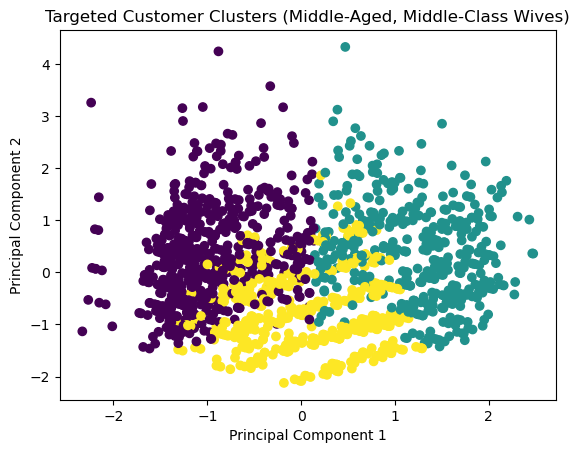

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Target middle-aged (35-55) and middle-class customers
middle_class_income_range = (40000, 100000)  # Adjust based on dataset

filtered_customers = customer_df[
    (customer_df['sex'] == 'F') & 
    (customer_df['age'].between(35, 55)) & 
    (customer_df['income'].between(*middle_class_income_range))
]

customer_features = filtered_customers[['income', 'age', 'family_size']]
customer_scaled = StandardScaler().fit_transform(customer_features)

# Re-run KMeans clustering with adjusted features
kmeans_customer = KMeans(n_clusters=3, random_state=42).fit(customer_scaled)
filtered_customers['customer_cluster'] = kmeans_customer.labels_

# PCA visualization
pca = PCA(n_components=2)
customer_pca = pca.fit_transform(customer_scaled)

plt.scatter(customer_pca[:, 0], customer_pca[:, 1], c=kmeans_customer.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Targeted Customer Clusters (Middle-Aged, Middle-Class Wives)')
plt.show()


#### Don't forget to describe the centers of the clusters you found. - The results below show that the income grows larger with a higher age, and the family size slightly increases (middle aged wives)

In [3]:
import pandas as pd

# Get cluster centers in scaled form
cluster_centers_scaled = kmeans_customer.cluster_centers_

# Convert back to original scale
cluster_centers = StandardScaler().fit(customer_features).inverse_transform(cluster_centers_scaled)

# Convert to DataFrame for better readability
cluster_summary = pd.DataFrame(cluster_centers, columns=customer_features.columns)
cluster_summary.index.name = 'Cluster'
print(cluster_summary)


               income        age  family_size
Cluster                                      
0        83686.009074  40.891107     2.232305
1        55487.309582  49.361179     2.223587
2        51128.687898  39.443737     1.467091


### 3. Testing Your Model
In the cell seen below, write the code you need to test your K-means model. Then, interpret your findings.

*Note, level 5 testing uses both an elbow plot and a silhouette score to evaluate your model. Level 4 uses one or the other.*

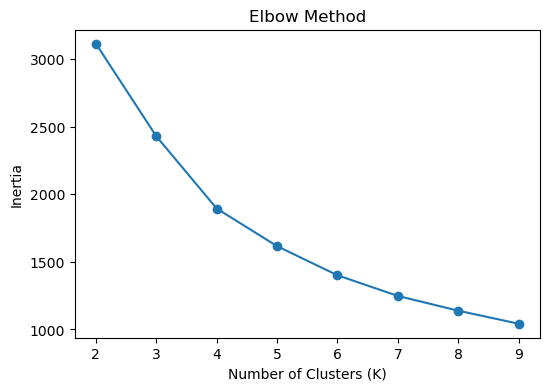

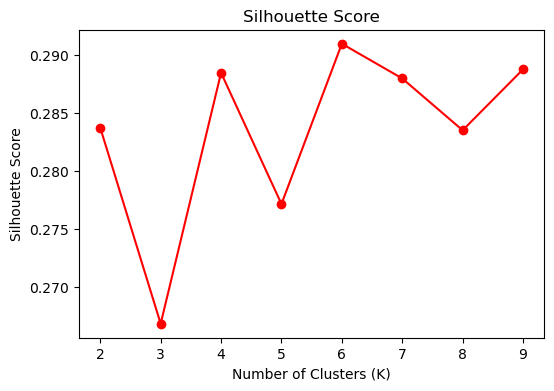

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_features)

# Elbow Method
inertia = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Silhouette Score
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(customer_scaled)
    score = silhouette_score(customer_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(k_values, silhouette_scores, marker='o', color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()


#### Interpret your elbow plot and/or silhouette score here.

### 4. Final Answer

In the first cell seen below, describe the cluster you have chosen to target with your ad, making sure to describe the type of ad they were the most likely to respond to. Then, use software of your choosing to create the ad you will need to target this cluster. You do not need to create an ad for both the nacho fries and the Baja Blast. You can focus on one if that's what your cluster cares about most.

In the second cell seen below, include a link to your ad.

*Note, a level 5 ad uses the medium (static image or video) the cluster most likely responded to.* 

#### MIddle aged wives with families

#### Link your ad here.